In [111]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [112]:
bids = Table.read_table('F2_bids_5.csv').sort('PORTFOLIO')
ESG = Table.read_table('ESGPorfolios_forcsv.csv')

In [113]:
bids.sort("PLANT_ID")

TEAM,TEAM_ID,PORTFOLIO,PORTFOLIO_ID,PLANT,PLANT_ID,PERIOD,PRICE1,PRICE2,PRICE3,PRICE4
Krugman,7,Big_Coal,1,Four Corners,11,5,346.5,36.5,36.5,346.5
Krugman,7,Big_Coal,1,ALAMITOS_7,12,5,75,75,75,75
Krugman,7,Big_Coal,1,HUNTINGTON_BEACH_1-2,13,5,40.5,40.5,40.5,40.5
Krugman,7,Big_Coal,1,HUNTINGTON_BEACH_5,14,5,67,67,367,67
Krugman,7,Big_Coal,1,REDONDO_5-6,15,5,42.3,41.94,41.94,42.3
Krugman,7,Big_Coal,1,REDONDO_7-8,16,5,242,242,41.94,242
Becker,2,Big_Gas,2,EL_SEGUNDO_1-2,21,5,44.97,44.97,61.97,44.97
Becker,2,Big_Gas,2,EL_SEGUNDO_3-4,22,5,41.97,44.97,61.97,44.97
Becker,2,Big_Gas,2,LONG_BEACH,23,5,52.97,52.97,61.97,52.97
Becker,2,Big_Gas,2,NORTH_ISLAND,24,5,65.97,65.97,65.97,65.97


In [114]:
ESG.sort("Plant_ID")

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay,Plant_ID
Big Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000",11
Big Coal,1,ALAMITOS 7,250,16.05,4.5,72.22,1.5,73.72,0.85,$0,12
Big Coal,1,HUNTINGTON BEACH 1&2,300,8.67,4.5,39,1.5,40.5,0.46,"$2,000",13
Big Coal,1,HUNTINGTON BEACH 5,150,14.44,4.5,65,1.5,66.5,0.77,"$2,000",14
Big Coal,1,REDONDO 5&6,350,8.99,4.5,40.44,1.5,41.94,0.48,"$3,000",15
Big Coal,1,REDONDO 7&8,950,8.99,4.5,40.44,1.5,41.94,0.48,"$5,000",16
Big Gas,2,EL SEGUNDO 1&2,400,9.63,4.5,43.33,1.5,44.83,0.51,"$1,000",21
Big Gas,2,EL SEGUNDO 3&4,650,8.83,4.5,39.72,1.5,41.22,0.47,"$1,000",22
Big Gas,2,LONG BEACH,550,11.56,4.5,52,0.5,52.5,0.61,"$2,000",23
Big Gas,2,NORTH ISLAND,150,14.44,4.5,65,0.5,65.5,0.77,$0,24


In [115]:
sorted_joined_table = bids.join("PLANT_ID", ESG, "Plant_ID").sort("PRICE1", descending = False)
sorted_joined_table.show(42)

PLANT_ID,TEAM,TEAM_ID,PORTFOLIO,PORTFOLIO_ID,PLANT,PERIOD,PRICE1,PRICE2,PRICE3,PRICE4,Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay
61,Coase,3,Old_Timers,6,BIG_CREEK,5,0,0,0,0,Old Timers,7,BIG CREEK,1000,nan,0,0,0,0,0,"$15,000"
72,Arrow,1,Low_Fossil,7,HELMS,5,0.5,0.5,0.5,0.5,Fossil Light,8,HELMS,800,nan,0,0,0.5,0.5,0,"$15,000"
75,Arrow,1,Low_Fossil,7,DIABLO_CANYON_1,5,11.5,11.5,11.5,11.5,Fossil Light,8,DIABLO CANYON 1,1000,1,7.5,7.5,4,11.5,0,"$20,000"
62,Coase,3,Old_Timers,6,MOHAVE_1,5,34.5,34.5,34.5,34.5,Old Timers,7,MOHAVE 1,750,10,3,30,4.5,34.5,0.94,"$15,000"
33,Friedman,5,Bay_Views,3,MOSS_LANDING_6,5,40,40,40,40,Bay Views,4,MOSS LANDING 6,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000"
34,Friedman,5,Bay_Views,3,MOSS_LANDING_7,5,40,40,40,40,Bay Views,4,MOSS LANDING 7,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000"
13,Krugman,7,Big_Coal,1,HUNTINGTON_BEACH_1-2,5,40.5,40.5,40.5,40.5,Big Coal,1,HUNTINGTON BEACH 1&2,300,8.67,4.5,39,1.5,40.5,0.46,"$2,000"
22,Becker,2,Big_Gas,2,EL_SEGUNDO_3-4,5,41.97,44.97,61.97,44.97,Big Gas,2,EL SEGUNDO 3&4,650,8.83,4.5,39.72,1.5,41.22,0.47,"$1,000"
25,Becker,2,Big_Gas,2,ENCINA,5,41.97,44.97,61.97,44.97,Big Gas,2,ENCINA,950,9.15,4.5,41.17,0.5,41.67,0.49,"$2,000"
15,Krugman,7,Big_Coal,1,REDONDO_5-6,5,42.3,41.94,41.94,42.3,Big Coal,1,REDONDO 5&6,350,8.99,4.5,40.44,1.5,41.94,0.48,"$3,000"


In [116]:
def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos


In [117]:
width = sorted_joined_table.column("Capacity_MW")
width
height = sorted_joined_table.column("PRICE1")
height
new_x = find_x_pos(width)

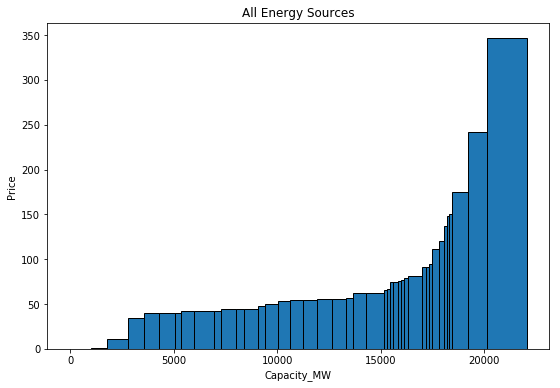

In [118]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x, height, width=width, edgecolor = "black")
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Price')

plt.show()

In [119]:
energy_colors_dict = {}
count = 0
colors = ['#EC5F67', '#F29056', '#F9C863', '#99C794', '#5FB3B3', '#6699CC', '#C594C5']
for i in set(sorted_joined_table['Group']):
    energy_colors_dict[i] = colors[count]
    count += 1

In [120]:
colors_mapped = list(pd.Series(sorted_joined_table['Group']).map(energy_colors_dict))
sorted_joined_table = sorted_joined_table.with_column('Color', colors_mapped)

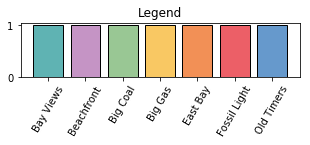

In [121]:
plt.figure(figsize=(5,1))
plt.bar(energy_colors_dict.keys(), 1, color = energy_colors_dict.values())
plt.xticks(rotation=60)
plt.title('Legend')
plt.show()

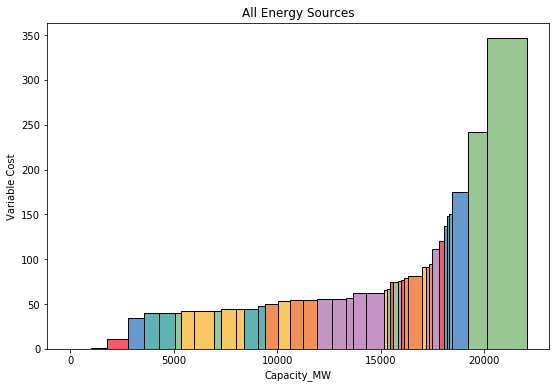

In [122]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x, height, width=width, color=sorted_joined_table['Color'], edgecolor = "black")
#plt.xticks(y_pos, bars)
# Add title and axis names
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')

plt.show()

In [123]:
demand = 15000

In [124]:
def price_calc(demand, sorted_table):
    price = 0
    sum_cap = 0
    for i in range(0,len(sorted_table['Capacity_MW'])):
        if sum_cap + sorted_table['Capacity_MW'][i] > demand:
            price = sorted_table['PRICE1'][i]
            break
        else:
            sum_cap += sorted_table['Capacity_MW'][i]
            price = sorted_table['PRICE1'][i]
    return price

In [125]:
price = price_calc(demand, sorted_joined_table)
price

62.27

In [126]:
def price_line_plot(price):
    plt.axhline(y=price, color='r', linewidth = 2)
    print("Price: " + str(price))

In [127]:
def demand_plot(demand):
    plt.axvline(x=demand, color='r', linewidth = 2)
    print("Capacity: " + str(demand))

Price: 62.27
Capacity: 15000


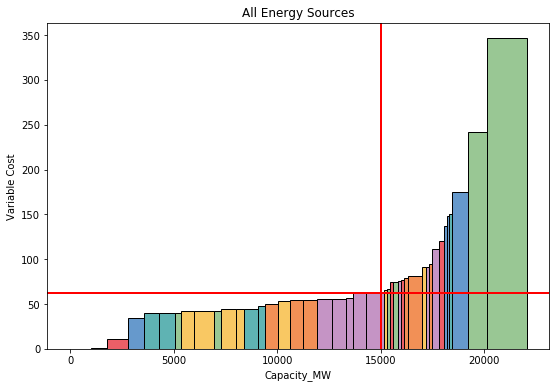

In [128]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x, height, width=width, color=sorted_joined_table['Color'], edgecolor = "black")
plt.title('All Energy Sources')
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost')
price_line_plot(price)
demand_plot(demand)

plt.show()

In [129]:
Big_Coal = sorted_joined_table.where("Group", "Big Coal")
width_coal = Big_Coal.column("Capacity_MW")
height_coal = Big_Coal.column("PRICE1")
new_x_coal = find_x_pos(width_coal)

Price: 62.27


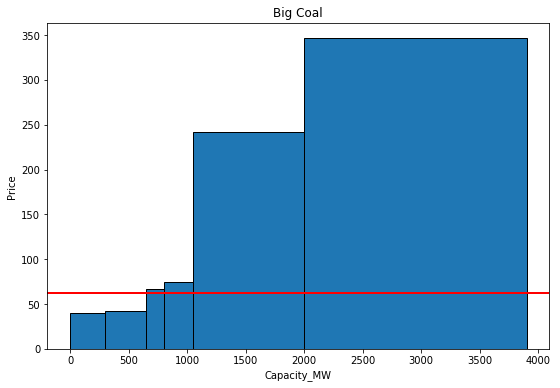

In [130]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x_coal, height_coal, width=width_coal, edgecolor = "black")
plt.title('Big Coal')
plt.xlabel('Capacity_MW')
plt.ylabel('Price')
price_line_plot(price)

plt.show()

In [131]:
def profit(sorted_table, price):
    capacity_subset = sum(sorted_table.where("PRICE1", are.below(price))["Capacity_MW"])
    revenue = capacity_subset * price
    cost = 0
    for i in range(len(sorted_table.where("PRICE1", are.below(price))["Total_Var_Cost_USDperMWH"])):
        cost += sorted_table.where("PRICE1", are.below(price))["Total_Var_Cost_USDperMWH"][i]\
        * sorted_table.where("PRICE1", are.below(price))["Capacity_MW"][i]
    return revenue - cost

In [132]:
profit(Big_Coal, price)

81923.0